In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import re
from datetime import datetime, timedelta

In [98]:
emotion = pd.read_csv("emotion_data.csv")

In [99]:
emotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  1816 non-null   float64
 1   Angry      1816 non-null   float64
 2   Disgust    1816 non-null   float64
 3   Fear       1816 non-null   float64
 4   Happy      1816 non-null   float64
 5   Sad        1816 non-null   float64
 6   Surprise   1816 non-null   float64
 7   Neutral    1816 non-null   float64
dtypes: float64(8)
memory usage: 113.6 KB


In [100]:
emotion.head()

,Timestamp,Angry,Disgust,Fear,Happy,Sad,Surprise,Neutral
0,1.690991e+09,0.04,0.0,0.02,0.0,0.06,0.00,0.87
1,1.690991e+09,0.14,0.0,0.03,0.0,0.13,0.01,0.69
2,1.690991e+09,0.10,0.0,0.03,0.0,0.12,0.01,0.75
3,1.690991e+09,0.05,0.0,0.03,0.0,0.09,0.01,0.82
4,1.690991e+09,0.11,0.0,0.06,0.0,0.17,0.02,0.64


In [101]:
emotion['timestamps_alt'] = emotion.Timestamp.apply(lambda x: datetime.fromtimestamp(x).strftime('%m/%d/%Y %H:%M:%S.%f')[:-3])

In [102]:
emotion

,Timestamp,Angry,Disgust,Fear,Happy,Sad,Surprise,Neutral,timestamps_alt
0,1.690991e+09,0.04,0.0,0.02,0.0,0.06,0.00,0.87,08/02/2023 11:35:25.418
1,1.690991e+09,0.14,0.0,0.03,0.0,0.13,0.01,0.69,08/02/2023 11:35:25.645
2,1.690991e+09,0.10,0.0,0.03,0.0,0.12,0.01,0.75,08/02/2023 11:35:25.857
3,1.690991e+09,0.05,0.0,0.03,0.0,0.09,0.01,0.82,08/02/2023 11:35:26.070
4,1.690991e+09,0.11,0.0,0.06,0.0,0.17,0.02,0.64,08/02/2023 11:35:26.280
...,...,...,...,...,...,...,...,...,...
1811,1.690991e+09,0.22,0.0,0.06,0.0,0.20,0.01,0.52,08/02/2023 11:41:31.298
1812,1.690991e+09,0.23,0.0,0.05,0.0,0.15,0.01,0.55,08/02/2023 11:41:31.503
1813,1.690991e+09,0.15,0.0,0.04,0.0,0.17,0.03,0.60,08/02/2023 11:41:31.691
1814,1.690991e+09,0.06,0.0,0.04,0.0,0.18,0.01,0.71,08/02/2023 11:41:31.863


In [103]:
log_file = open('file.log', 'r', encoding='utf-8')

In [104]:
all_lines = log_file.readlines()

In [105]:
damage_giventime = []
damage_takentime = []

timestamp_pattern = r'\d{2}/\d{2}/\d{4} - \d{2}:\d{2}:\d{2}'

for line in all_lines:
    timestamp_match = re.match(timestamp_pattern, line)
    if not timestamp_match:
        # If the line does not start with the timestamp format, skip it
        continue

    ts = datetime.strptime(timestamp_match.group(), '%m/%d/%Y - %H:%M:%S').strftime('%m/%d/%Y %H:%M:%S')
    info = line[23:]

    if info.startswith('Damage Taken'):
        damage = re.findall(r'\d+ in \d+ hits', info)
        if damage == []:
            damage = re.findall(r'\d+ in \d+ hit', info)
        if damage:
            damage = damage[0].split()[0]
            damage_takentime.append((ts, datetime.strptime(ts, '%m/%d/%Y %H:%M:%S').timestamp(), int(damage)))
            # print(damage, 'Taken')
        continue

    if info.startswith('Damage Given'):
        damage = re.findall(r'\d+ in \d hits', info)
        if damage == []:
            damage = re.findall(r'\d+ in \d+ hit', info)
        if damage:
            damage = damage[0].split()[0]
            damage_giventime.append((ts, datetime.strptime(ts, '%m/%d/%Y %H:%M:%S').timestamp(), int(damage)))
            # print(damage, 'Given')
        continue

In [106]:
damage_giventime

[('08/02/2023 11:36:03', 1690990563.0, 102),
 ('08/02/2023 11:36:12', 1690990572.0, 26),
 ('08/02/2023 11:36:51', 1690990611.0, 92),
 ('08/02/2023 11:37:37', 1690990657.0, 84),
 ('08/02/2023 11:38:06', 1690990686.0, 26),
 ('08/02/2023 11:38:28', 1690990708.0, 97),
 ('08/02/2023 11:39:26', 1690990766.0, 133),
 ('08/02/2023 11:41:25', 1690990885.0, 54)]

In [107]:
event_kill = damage_giventime[0]
mark_kill = event_kill[1]
tolerance_seconds = 2

# Calculate the start and end timestamps for the emotion_mark interval
start_time_kill = mark_kill - tolerance_seconds
end_time_kill = mark_kill + tolerance_seconds

# Filter the emotion DataFrame to get the emotion_mark data within the specified interval
emotion_mark_kill = emotion[(emotion['Timestamp'] >= start_time_kill) & (emotion['Timestamp'] <= end_time_kill)]

In [108]:
emotion_mark_kill

,Timestamp,Angry,Disgust,Fear,Happy,Sad,Surprise,Neutral,timestamps_alt
174,1.690991e+09,0.25,0.01,0.05,0.01,0.27,0.04,0.38,08/02/2023 11:36:01.072
175,1.690991e+09,0.36,0.00,0.06,0.00,0.32,0.03,0.22,08/02/2023 11:36:01.276
176,1.690991e+09,0.26,0.00,0.06,0.01,0.37,0.08,0.22,08/02/2023 11:36:01.482
177,1.690991e+09,0.35,0.00,0.05,0.01,0.30,0.08,0.21,08/02/2023 11:36:01.686
178,1.690991e+09,0.32,0.00,0.05,0.01,0.21,0.13,0.29,08/02/2023 11:36:01.895
179,1.690991e+09,0.37,0.00,0.03,0.00,0.21,0.13,0.26,08/02/2023 11:36:02.107
180,1.690991e+09,0.28,0.00,0.05,0.01,0.14,0.22,0.30,08/02/2023 11:36:02.331
181,1.690991e+09,0.44,0.00,0.04,0.00,0.16,0.22,0.14,08/02/2023 11:36:02.556
182,1.690991e+09,0.41,0.00,0.05,0.01,0.19,0.18,0.17,08/02/2023 11:36:02.787
183,1.690991e+09,0.24,0.00,0.09,0.01,0.17,0.30,0.19,08/02/2023 11:36:03.013


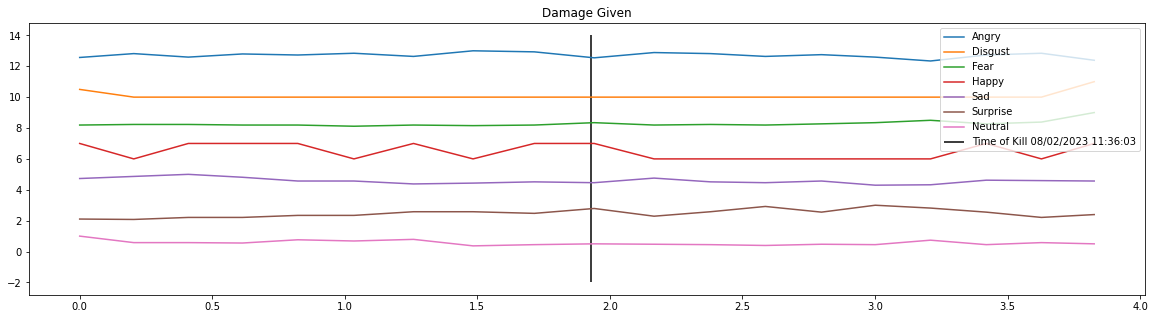

In [109]:
dam = event_kill[2]
Angry_kill = emotion_mark_kill['Angry']
Disgust_kill = emotion_mark_kill['Disgust']
Fear_kill = emotion_mark_kill['Fear']
Happy_kill = emotion_mark_kill['Happy']
Sad_kill = emotion_mark_kill['Sad']
Surprise_kill = emotion_mark_kill['Surprise']
Neutral_kill = emotion_mark_kill['Neutral']

# Convert emotion_mark.Timestamp to pandas Timestamp objects
x_kill = np.array(emotion_mark_kill.Timestamp)

plt.figure(figsize=(20, 5))
plt.plot(x_kill - x_kill[0], Angry_kill / max(abs(Angry_kill)) + 12, label='Angry')
plt.plot(x_kill - x_kill[0], Disgust_kill / max(abs(Disgust_kill)) + 10, label='Disgust')
plt.plot(x_kill - x_kill[0], Fear_kill / max(abs(Fear_kill)) + 8, label='Fear')
plt.plot(x_kill - x_kill[0], Happy_kill / max(abs(Happy_kill)) + 6, label='Happy')
plt.plot(x_kill - x_kill[0], Sad_kill / max(abs(Sad_kill)) + 4, label='Sad')
plt.plot(x_kill - x_kill[0], Surprise_kill / max(abs(Surprise_kill)) + 2, label='Surprise')
plt.plot(x_kill - x_kill[0], Neutral_kill / max(abs(Neutral_kill)), label='Neutral')
plt.vlines(mark_kill - x_kill[0], -2, 14, colors='black', label=f'Time of Kill {event_kill[0]}')
plt.title("Damage Given")
plt.legend(loc='upper right')
plt.show()

In [110]:
damage_takentime

[('08/02/2023 11:36:03', 1690990563.0, 72),
 ('08/02/2023 11:36:03', 1690990563.0, 40),
 ('08/02/2023 11:36:12', 1690990572.0, 141),
 ('08/02/2023 11:36:36', 1690990596.0, 28),
 ('08/02/2023 11:36:51', 1690990611.0, 135),
 ('08/02/2023 11:37:24', 1690990644.0, 178),
 ('08/02/2023 11:37:37', 1690990657.0, 140),
 ('08/02/2023 11:37:51', 1690990671.0, 106),
 ('08/02/2023 11:38:06', 1690990686.0, 100),
 ('08/02/2023 11:38:28', 1690990708.0, 38),
 ('08/02/2023 11:38:28', 1690990708.0, 31),
 ('08/02/2023 11:39:15', 1690990755.0, 46),
 ('08/02/2023 11:39:26', 1690990766.0, 48),
 ('08/02/2023 11:39:26', 1690990766.0, 103),
 ('08/02/2023 11:39:56', 1690990796.0, 103),
 ('08/02/2023 11:40:15', 1690990815.0, 105),
 ('08/02/2023 11:40:25', 1690990825.0, 141),
 ('08/02/2023 11:40:33', 1690990833.0, 129),
 ('08/02/2023 11:40:44', 1690990844.0, 104),
 ('08/02/2023 11:41:25', 1690990885.0, 115)]

In [111]:
event_death = damage_takentime[0]
mark_death = event_death[1]

# Calculate the start and end timestamps for the emotion_mark interval
start_time_death = mark_death - tolerance_seconds
end_time_death = mark_death + tolerance_seconds

# Filter the emotion DataFrame to get the emotion_mark data within the specified interval
emotion_mark_death = emotion[(emotion['Timestamp'] >= start_time_death) & (emotion['Timestamp'] <= end_time_death)]

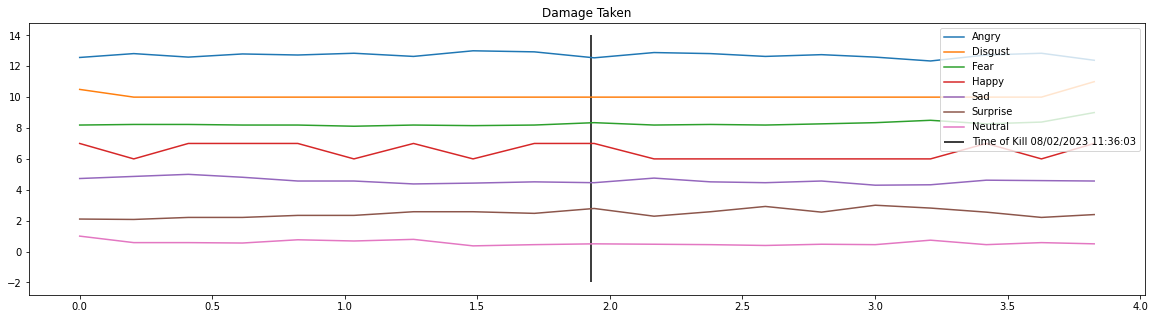

In [112]:
dam = event_death[2]
Angry_death = emotion_mark_death['Angry']
Disgust_death = emotion_mark_death['Disgust']
Fear_death = emotion_mark_death['Fear']
Happy_death = emotion_mark_death['Happy']
Sad_death = emotion_mark_death['Sad']
Surprise_death = emotion_mark_death['Surprise']
Neutral_death = emotion_mark_death['Neutral']

# Convert emotion_mark.Timestamp to pandas Timestamp objects
x_death = np.array(emotion_mark_death.Timestamp)

plt.figure(figsize=(20, 5))
plt.plot(x_death - x_death[0], Angry_death / max(abs(Angry_death)) + 12, label='Angry')
plt.plot(x_death - x_death[0], Disgust_death / max(abs(Disgust_death)) + 10, label='Disgust')
plt.plot(x_death - x_death[0], Fear_death / max(abs(Fear_death)) + 8, label='Fear')
plt.plot(x_death - x_death[0], Happy_death / max(abs(Happy_death)) + 6, label='Happy')
plt.plot(x_death - x_death[0], Sad_death / max(abs(Sad_death)) + 4, label='Sad')
plt.plot(x_death - x_death[0], Surprise_death / max(abs(Surprise_death)) + 2, label='Surprise')
plt.plot(x_death - x_death[0], Neutral_death / max(abs(Neutral_death)), label='Neutral')
plt.vlines(mark_death - x_death[0], -2, 14, colors='black', label=f'Time of Kill {event_death[0]}')
plt.title("Damage Taken")
plt.legend(loc='upper right')
plt.show()

In [113]:
mark_total_kills = [event[1] for event in damage_giventime if event[2] >= 100]
#mark_total_kills = mark_total_kills[1:]
print(mark_total_kills)

[1690990563.0, 1690990766.0]


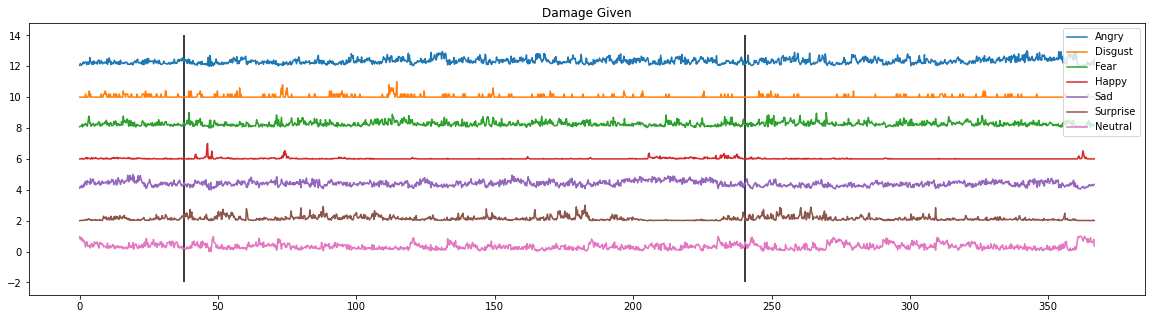

In [114]:
# draw the whole plot
Angry = emotion['Angry']
Disgust = emotion['Disgust']
Fear = emotion['Fear']
Happy = emotion['Happy']
Sad = emotion['Sad']
Surprise = emotion['Surprise']
Neutral = emotion['Neutral']
x_total = np.array(emotion.Timestamp)

plt.figure(figsize=(20, 5))
plt.plot(x_total - x_total[0], Angry / max(abs(Angry)) + 12, label='Angry')
plt.plot(x_total - x_total[0], Disgust / max(abs(Disgust)) + 10, label='Disgust')
plt.plot(x_total - x_total[0], Fear / max(abs(Fear)) + 8, label='Fear')
plt.plot(x_total - x_total[0], Happy / max(abs(Happy)) + 6, label='Happy')
plt.plot(x_total - x_total[0], Sad / max(abs(Sad)) + 4, label='Sad')
plt.plot(x_total - x_total[0], Surprise / max(abs(Surprise)) + 2, label='Surprise')
plt.plot(x_total - x_total[0], Neutral / max(abs(Neutral)), label='Neutral')
for mark_individual_kill in mark_total_kills:
        plt.vlines(mark_individual_kill - x_total[0], -2, 14, colors='black')
plt.title("Damage Given")
plt.legend(loc='upper right')
plt.savefig("Kill Timestamp.png")
plt.show()
plt.close()

In [115]:
mark_total_death = [event[1] for event in damage_takentime if event[2] >= 100]
#mark_total_death = mark_total_death[6:]
print(mark_total_death)

[1690990572.0, 1690990611.0, 1690990644.0, 1690990657.0, 1690990671.0, 1690990686.0, 1690990766.0, 1690990796.0, 1690990815.0, 1690990825.0, 1690990833.0, 1690990844.0, 1690990885.0]


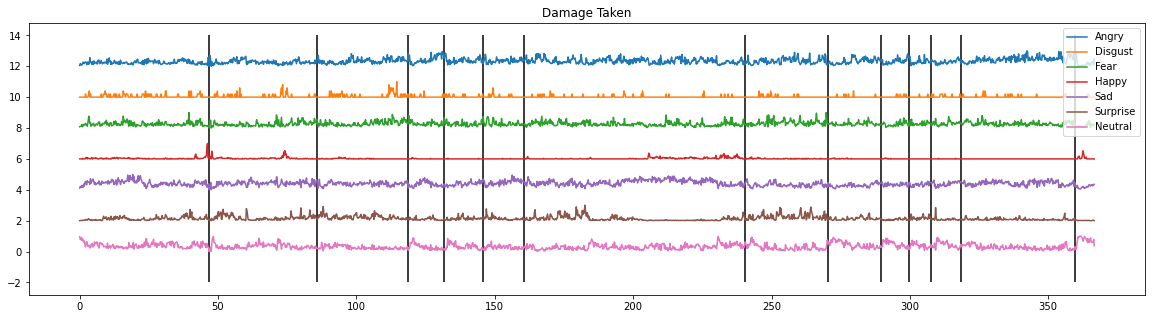

In [116]:
# draw the whole plot
Angry = emotion['Angry']
Disgust = emotion['Disgust']
Fear = emotion['Fear']
Happy = emotion['Happy']
Sad = emotion['Sad']
Surprise = emotion['Surprise']
Neutral = emotion['Neutral']
x_total = np.array(emotion.Timestamp)

plt.figure(figsize=(20, 5))
plt.plot(x_total - x_total[0], Angry / max(abs(Angry)) + 12, label='Angry')
plt.plot(x_total - x_total[0], Disgust / max(abs(Disgust)) + 10, label='Disgust')
plt.plot(x_total - x_total[0], Fear / max(abs(Fear)) + 8, label='Fear')
plt.plot(x_total - x_total[0], Happy / max(abs(Happy)) + 6, label='Happy')
plt.plot(x_total - x_total[0], Sad / max(abs(Sad)) + 4, label='Sad')
plt.plot(x_total - x_total[0], Surprise / max(abs(Surprise)) + 2, label='Surprise')
plt.plot(x_total - x_total[0], Neutral / max(abs(Neutral)), label='Neutral')
for mark_individual_death in mark_total_death:
        plt.vlines(mark_individual_death - x_total[0], -2, 14, colors='black')
plt.title("Damage Taken")
plt.legend(loc='upper right')
plt.savefig("Death Timestamp.png")
plt.show()
plt.close()

In [117]:
import re

def parse_log_file(log_file_path):
    kills = {}
    health_data = {}

    with open(log_file_path, 'r') as log_file:
        for line in log_file:
            # Check if the line contains damage given information
            match_damage = re.search(r'Damage Given to "(.+)<\d+><\w+><\w+><\d+>" \(damage "(.*)" total', line)
            if match_damage:
                player = match_damage.group(1)
                damage_given = int(match_damage.group(2))
                timestamp = line[:8]  # Assuming the timestamp is the first 8 characters in the line (hh:mm:ss)

                # Update health data for the player
                if player not in health_data:
                    health_data[player] = 100  # Assuming players start with 100 HP
                health_data[player] -= damage_given

                # Check if the player died
                if health_data[player] <= 0:
                    kills[player] = (timestamp, damage_given)

            # Check if the line contains healing information (optional)
            match_heal = re.search(r'Healed "(.+)<\d+><\w+><\w+><\d+>" for "(.*)" \(.*\) \(.*\)', line)
            if match_heal:
                player = match_heal.group(1)
                heal_amount = int(match_heal.group(2))

                # Update health data for the player
                if player in health_data:
                    health_data[player] += heal_amount

    return kills

# Usage example:
kills = parse_log_file(log_file)

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/csgo.log'